## Задача 1 (макс. 11 баллов):

На сайте https://www.kaggle.com/c/shelter-animal-outcomes/data прочтите описание и скачайте train.csv

Все вопросы ниже предполагают ответ в графическом виде.

1. (1 балл) Кого в питомнике больше: кошек или собак?
2. (1 балл) Какие бывают OutcomeType и сколько их?
3. (1 балл) Как связаны пол животного и OutcomeType?
4. (1 балл) Как связаны вид животного и OutcomeType?
5. (2 балла) Создайте колонку Mix для "смешанных" пород. Придумайте, как определить, что порода у животного не чистая. Связан ли факт смешанной породы c OutcomeType?
6. (3 балла) Из AgeuponOutcome создайте числовую колонку AgeInYears, в которой запишите возраст животного в годах. Постройте гистограмму возрастов животных.
7. (2 балл) Разбейте всех животных на 4 возрастных группы: <3 лет ; 3-5 лет; 5-10 лет; >10 лет. Влияет ли группа на OutcomeType?

In [3]:
import pandas as pd 
import numpy as np
from matplotlib import pylab as plt

df_train = pd.read_csv('train.csv',';')

#(1 балл) Кого в питомнике больше: кошек или собак?
animalTypes = df_train['AnimalType'].value_counts()
plt.bar(animalTypes.index.tolist(), height = animalTypes.tolist() ) 
plt.show()


<Figure size 640x480 with 1 Axes>

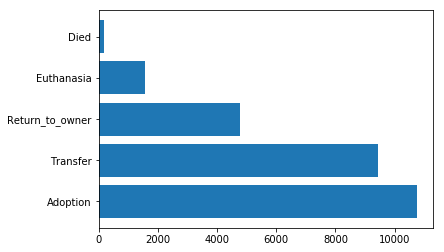

In [4]:
#Какие бывают OutcomeType и сколько их?

outcome_type = df_train['OutcomeType'].value_counts()
plt.barh(outcome_type.index.tolist(), width = outcome_type.tolist() ) 
plt.show()

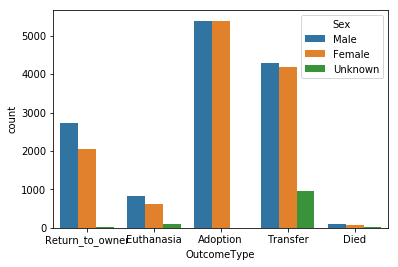

In [5]:
# Как связаны пол животного и OutcomeType?
import seaborn as sns
%matplotlib inline

def get_sex(sexupon_outcome):

    if 'Female' in sexupon_outcome:
        return 'Female'
    if 'Male' in sexupon_outcome:
        return 'Male' 
    
    return 'Unknown'

df_train['Sex'] = df_train.apply(lambda x: get_sex(str(x.SexuponOutcome)), axis=1)

sns.countplot( x = 'OutcomeType'
              ,hue = 'Sex'
              ,data = df_train )


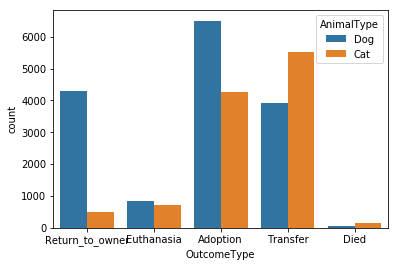

In [6]:
#Как связаны вид животного и OutcomeType?

sns.countplot( x = 'OutcomeType'
              ,hue = 'AnimalType'
              ,data = df_train )

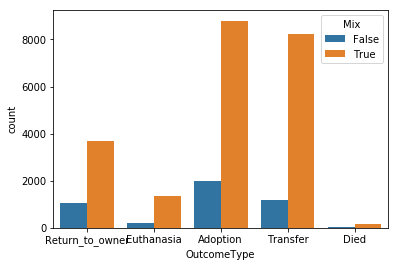

In [7]:
#Создайте колонку Mix для "смешанных" пород. Придумайте, как определить, что порода у животного не чистая. 
#Связан ли факт смешанной породы c OutcomeType?

df_train['Mix'] = df_train[['Breed']].apply(lambda x: 'Mix' in str(x), axis=1)

sns.countplot( x = 'OutcomeType'
              ,hue = 'Mix'
              ,data = df_train )


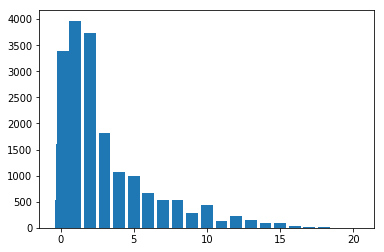

In [8]:
#Из AgeuponOutcome создайте числовую колонку AgeInYears, в которой запишите возраст животного в годах. 
#Постройте гистограмму возрастов животных.

def get_age_in_year(age_string):
    try:
        if 'year' in age_string:
            return int(age_string.split()[0])
        if 'month' in age_string:
            return round(int(age_string.split()[0])/12,2)
        if 'week' in age_string:
            return round(int(age_string.split()[0])/52,2)
        if 'day' in age_string:
            return round(int(age_string.split()[0])/365,2)
    except:
        return None

df_train['Age'] = df_train.apply(lambda x: get_age_in_year(x.AgeuponOutcome), axis=1)

ages = df_train['Age'].value_counts()
plt.bar(ages.index.tolist(), height = ages.tolist()) 
plt.show()

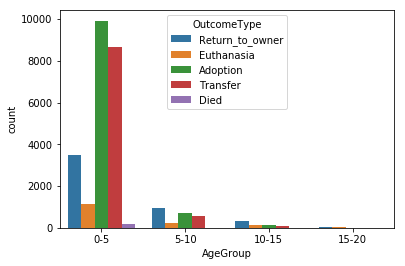

In [9]:
#Разбейте всех животных на 4 возрастных группы: 5 лет. Влияет ли группа на OutcomeType?
def choose_age_group(age):
    if age > 0 and age <= 5:
        return '0-5'
    if age > 5 and age <= 10:
        return '5-10'
    if age > 10 and age <= 15:
        return '10-15'
    if age > 15 and age <= 20:
        return '15-20'


df_train['AgeGroup'] = df_train.apply(lambda x: choose_age_group(x.Age), axis=1)

sns.countplot( x = 'AgeGroup'
              ,hue = 'OutcomeType'
              ,data = df_train)

## Задача 2 (макс 4 балла)

Скачайте файл data-405-2018-10-03.xml в Телеграмме.

1. (3 балла) Распарсите xml с помощью xml.etree.ElementTree. Для каждого маршрута (Track) создайте 2 массива: x – значения долготы (~55°), y – значения широты (~37°) точек маршрута.
2. (1 балл) Полученные треки визуализируйте на графике .

In [23]:
# Распарсите xml с помощью xml.etree.ElementTree. 
# Для каждого маршрута (Track) создайте 2 массива: 
# x – значения долготы (~55°), y – значения широты (~37°) точек маршрута.

import xml.etree.ElementTree as ET 

def parse_xml(xml_file): 
  
    # создаем tree объект 
    tree = ET.parse(xml_file) 
  
    # достаем из дерева корневой элемент 
    root = tree.getroot() 
  
    # создаем пустой лист для единиц новостей 
    track_list = [] 
  
    # итерируемся по новостям 
    for item in root.findall('.array'): # ищем элементы по пути
        track = {}
        
        # итерируемся по дочерним элементам
        for child in item:  
            track[child.tag] = child.text
  
        track_list.append(track) 
      
    return track_list 

tracks = parse_xml('data-405-2018-10-03.xml')

for track in tracks:
    points = track['Track'].split(';')
    x_list = []
    y_list = []
    for point in points:
        yx = point.split(',')
        x_list.append(yx[1])
        y_list.append(yx[0])
    
    track['x_list'] = x_list
    track['y_list'] = y_list


In [ ]:
# Полученные треки визуализируйте на графике .

fig, ax = plt.subplots(figsize=(15,10))
for track in tracks: 
    ax.plot(track['x_list'], track['y_list'], color="red", linewidth=0.25)

